# Semantic Resuls


In [ ]:
import pandas as pd
df = pd.read_csv('/home/sajadi/backup/projects/reports/semanticresults/outputs/spearman/spearman2.csv', sep=',', header=0)
df

In [ ]:
df=df.dropna(subset=[df.columns[0]])
df

In [ ]:
tb_no=2

In [ ]:
df1= df.drop('wordsim_similarity-edited', axis=1)
df1= df1.drop('wordsim_relatedness-edited', axis=1)
df1= df1.drop('minimayo.1', axis=1)
df1= df1.drop('minimayo.2', axis=1)
#df1= df1.drop('minimayo.3', axis=1)
#df1 = df1.columns.rename({'Unnamed: 0':'method'})
df1=df1.rename(columns={'Unnamed: 0':'method'})


In [ ]:
def methodselect(r):
    if tb_no==1:
        return r.loc['method'] in \
            [
             'ams/results.txt','all/nged/results.txt', 'all/hits/pagerank/results.cos.txt',  'all/hits/rvspagerank/results.cos.txt',
             'hitsboth.avg.rvspagerank.rvspagerank/results.cos.txt',
            ]
    if tb_no==2:
        return r.loc['method'] in \
            ['in/no/results.txt','in/nged/results.txt', 'in/hits/pagerank/results.cos.txt',  'in/hits/rvspagerank/results.cos.txt',
             'out/no/results.txt','out/nged/results.txt', 'out/hits/pagerank/results.cos.txt',  'out/hits/rvspagerank/results.cos.txt',
             'all/no/results.txt','all/nged/results.txt', 'all/hits/pagerank/results.cos.txt',  'all/hits/rvspagerank/results.cos.txt',
             'rec/no/results.txt','rec/nged/results.txt', 'rec/hits/pagerank/results.cos.txt',  'rec/hits/rvspagerank/results.cos.txt',
             'hitsboth.avg.rvspagerank.rvspagerank/results.cos.txt',
            ]
    
df2 = df1[df1.apply(methodselect, axis=1)]
df2

In [ ]:
idx = df2.loc[:,'method']
idx=idx.apply(lambda x: x[0:3])
df3=df2.copy()
df3.insert(0,'dir',idx)
df3

In [ ]:
import re
def rename(x):
    m=re.search('.*/([^/]*)/results.*', x)
    if m is not None:
        return m.group(1)
    if 'hitsboth.avg.rvspagerank.rvspagerank/results' in x:
        return 'rvsPageRank-avg'
idx = df3.loc[:,'method']
idx=idx.apply(rename)
df4=df3.copy()
df4.loc[:,'method']=idx
#df4.insert(1,'simmethod',idx)
df4
# s='rec/hits/rvspagerank/results.cos.txt'
# re.search('.*/([^/]*)/results.*', s).group(1)


In [ ]:
df4.loc[:,'method']=pd.Categorical(df4.loc[:,'method'],['no','eo','nged', 'pagerank','rvspagerank','rvsPageRank-avg' ])
df4.loc[:,'dir']=pd.Categorical(df4.loc[:,'dir'],['in/','out','rec','all','hit'])
df4
# if tb_no==2:
#     midf[2]=pd.Categorical(midf[1],['ilp','simplecontext','entitycontext', 'keyq','keydisamb' ])


In [ ]:
df6 = df4.copy().sort_values(by=['dir','method'])
df6.index = pd.MultiIndex.from_arrays([df6['dir'], df6['method']],names=['dir', 'Method'])
df6=df6.drop('dir', axis=1)
df6=df6.drop('method', axis=1)

df6

In [ ]:
print df6.to_latex()

# All vs Average, Kend vs Cos

In [2]:
tb_no=5

In [3]:
import pandas as pd
df = pd.read_csv('/home/sajadi/backup/projects/reports/semanticresults/outputs/spearman/spearman2.csv', sep=',', header=0)
df=df.dropna(subset=[df.columns[0]])
df

,Unnamed: 0,29-edited,65-edited,353-edited,wordsim_similarity-edited,wordsim_relatedness-edited,kore-edited,minimayo.2,minimayo.1,minimayo.3,MayoSRS-edited,UMNSRS_similarity-edited,UMNSRS_relatedness-edited
0,lgd/results.txt,0.86,0.81,0.69,0.79,0.62,0.62,0.62,0.68,0.66,0.46,0.58,0.50
1,coup/results.txt,0.90,0.75,0.67,0.77,0.54,0.61,0.61,0.66,0.64,0.43,0.49,0.40
2,ams/results.txt,0.86,0.80,0.69,0.79,0.61,0.63,0.58,0.66,0.64,0.44,0.54,0.44
3,ams2/results.txt,0.88,0.81,0.69,0.79,0.59,0.65,0.65,0.72,0.69,0.48,0.55,0.46
4,adamin/results.txt,0.80,0.78,0.65,0.72,0.62,0.50,0.69,0.72,0.71,0.48,0.58,0.53
5,adamout/results.txt,0.88,0.82,0.66,0.76,0.57,0.66,0.69,0.73,0.72,0.45,0.56,0.48
6,adamboth/results.txt,0.82,0.80,0.66,0.73,0.63,0.55,0.69,0.75,0.74,0.50,0.59,0.54
7,lngd/results.txt,0.86,0.82,0.68,0.78,0.61,0.68,0.63,0.69,0.67,0.49,0.58,0.50
8,in/no/results.txt,0.86,0.82,0.66,NaN,NaN,0.64,0.62,0.68,0.66,0.47,0.58,0.50
9,in/eo/results.txt,0.83,0.79,0.67,NaN,NaN,0.61,0.72,0.71,0.73,0.48,0.59,0.53


In [4]:
df1= df.drop('wordsim_similarity-edited', axis=1)
df1= df1.drop('wordsim_relatedness-edited', axis=1)
df1= df1.drop('minimayo.1', axis=1)
df1= df1.drop('minimayo.2', axis=1)
#df1= df1.drop('minimayo.3', axis=1)
#df1 = df1.columns.rename({'Unnamed: 0':'method'})
df1=df1.rename(columns={'Unnamed: 0':'method'})

In [5]:
def methodselect(r):
    if tb_no==3:
        return ('.cos.' in r.loc['method']) and (('rec/' in r.loc['method']) or ('all/' in r.loc['method']) or ('.avg.' in r.loc['method'])) \
        and    (r.loc['method'] not in ['hitsboth.avg.katz.katz/results.cos.txt', 'hitsboth.avg.pagerank.rvspagerank/results.cos.txt','hitsboth.avg.hitsi.hitso/results.cos.txt'])
    if tb_no==4:
        return ('hitsboth.avg.' in r.loc['method']) \
        and    (r.loc['method'] not in ['hitsboth.avg.katz.katz/results.cos.txt', 'hitsboth.avg.pagerank.rvspagerank/results.cos.txt','hitsboth.avg.hitsi.hitso/results.cos.txt',
                                        'hitsboth.avg.katz.katz/results.kend1.txt', 'hitsboth.avg.pagerank.rvspagerank/results.kend1.txt','hitsboth.avg.hitsi.hitso/results.kend1.txt'])
    if tb_no==5:
        return ('.kend' not in r.loc['method']) \
        and    (r.loc['method'] not in ['hitsboth.avg.katz.katz/results.cos.txt', 'hitsboth.avg.pagerank.rvspagerank/results.cos.txt','hitsboth.avg.hitsi.hitso/results.cos.txt'])

df2 = df1[df1.apply(methodselect, axis=1)]
df2

,method,29-edited,65-edited,353-edited,kore-edited,minimayo.3,MayoSRS-edited,UMNSRS_similarity-edited,UMNSRS_relatedness-edited
0,lgd/results.txt,0.86,0.81,0.69,0.62,0.66,0.46,0.58,0.50
1,coup/results.txt,0.90,0.75,0.67,0.61,0.64,0.43,0.49,0.40
2,ams/results.txt,0.86,0.80,0.69,0.63,0.64,0.44,0.54,0.44
3,ams2/results.txt,0.88,0.81,0.69,0.65,0.69,0.48,0.55,0.46
4,adamin/results.txt,0.80,0.78,0.65,0.50,0.71,0.48,0.58,0.53
5,adamout/results.txt,0.88,0.82,0.66,0.66,0.72,0.45,0.56,0.48
6,adamboth/results.txt,0.82,0.80,0.66,0.55,0.74,0.50,0.59,0.54
7,lngd/results.txt,0.86,0.82,0.68,0.68,0.67,0.49,0.58,0.50
8,in/no/results.txt,0.86,0.82,0.66,0.64,0.66,0.47,0.58,0.50
9,in/eo/results.txt,0.83,0.79,0.67,0.61,0.73,0.48,0.59,0.53


In [6]:
df2.loc[:,'method'] = df2.loc[:,'method'].str.replace('katz.old','katz')
df2[df2.apply(lambda r: 'katz' in r.loc['method'], axis=1)]

/home/sajadi/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,method,29-edited,65-edited,353-edited,kore-edited,minimayo.3,MayoSRS-edited,UMNSRS_similarity-edited,UMNSRS_relatedness-edited
39,in/hits/katz/results.cos.txt,0.78,0.80,0.55,0.62,0.70,0.50,0.50,0.45
40,out/hits/katz/results.cos.txt,0.81,0.66,0.51,0.60,0.48,0.42,0.36,0.30
41,all/hits/katz/results.cos.txt,0.75,0.78,0.55,0.65,0.69,0.56,0.55,0.51
42,rec/hits/katz/results.cos.txt,0.82,0.82,0.59,0.70,0.66,0.47,0.51,0.44
43,hitsboth.katz.katz/results.cos.txt,0.81,0.71,0.55,NaN,0.61,0.47,0.42,0.37
45,hitsboth.avg.katz.katz/results.cos.txt,0.75,0.79,0.56,0.66,0.69,0.55,0.54,0.50


In [7]:
df3=df2.set_index('method')
df3.index

Index([u'lgd/results.txt', u'coup/results.txt', u'ams/results.txt',
       u'ams2/results.txt', u'adamin/results.txt', u'adamout/results.txt',
       u'adamboth/results.txt', u'lngd/results.txt', u'in/no/results.txt',
       u'in/eo/results.txt', u'in/ged/results.txt', u'in/nged/results.txt',
       u'out/no/results.txt', u'out/eo/results.txt', u'out/ged/results.txt',
       u'out/nged/results.txt', u'all/no/results.txt', u'all/eo/results.txt',
       u'all/ged/results.txt', u'all/nged/results.txt', u'rec/no/results.txt',
       u'rec/eo/results.txt', u'rec/ged/results.txt', u'rec/nged/results.txt',
       u'in/simrank-0.8/results.0.5.txt',
       u'out/rvs-simrank-0.8/results.0.5.txt',
       u'all/p-rank-0.8/results.0.5.txt', u'in/hits/fied/results.cos.txt',
       u'out/hits/fied/results.cos.txt', u'all/hits/fied/results.cos.txt',
       u'rec/hits/fied/results.cos.txt', u'hitsboth.fied.fied/results.cos.txt',
       u'hitsboth.avg.fied.fied/results.cos.txt',
       u'in/hits/katz/re

In [8]:
#df4=df3.iloc[:,3:]
df4=df3.copy()

In [9]:
df4=df4.applymap(lambda x:max(x,0))
df4

,29-edited,65-edited,353-edited,kore-edited,minimayo.3,MayoSRS-edited,UMNSRS_similarity-edited,UMNSRS_relatedness-edited
method,,,,,,,,
lgd/results.txt,0.86,0.81,0.69,0.62,0.66,0.46,0.58,0.50
coup/results.txt,0.90,0.75,0.67,0.61,0.64,0.43,0.49,0.40
ams/results.txt,0.86,0.80,0.69,0.63,0.64,0.44,0.54,0.44
ams2/results.txt,0.88,0.81,0.69,0.65,0.69,0.48,0.55,0.46
adamin/results.txt,0.80,0.78,0.65,0.50,0.71,0.48,0.58,0.53
adamout/results.txt,0.88,0.82,0.66,0.66,0.72,0.45,0.56,0.48
adamboth/results.txt,0.82,0.80,0.66,0.55,0.74,0.50,0.59,0.54
lngd/results.txt,0.86,0.82,0.68,0.68,0.67,0.49,0.58,0.50
in/no/results.txt,0.86,0.82,0.66,0.64,0.66,0.47,0.58,0.50


# Avg vs All

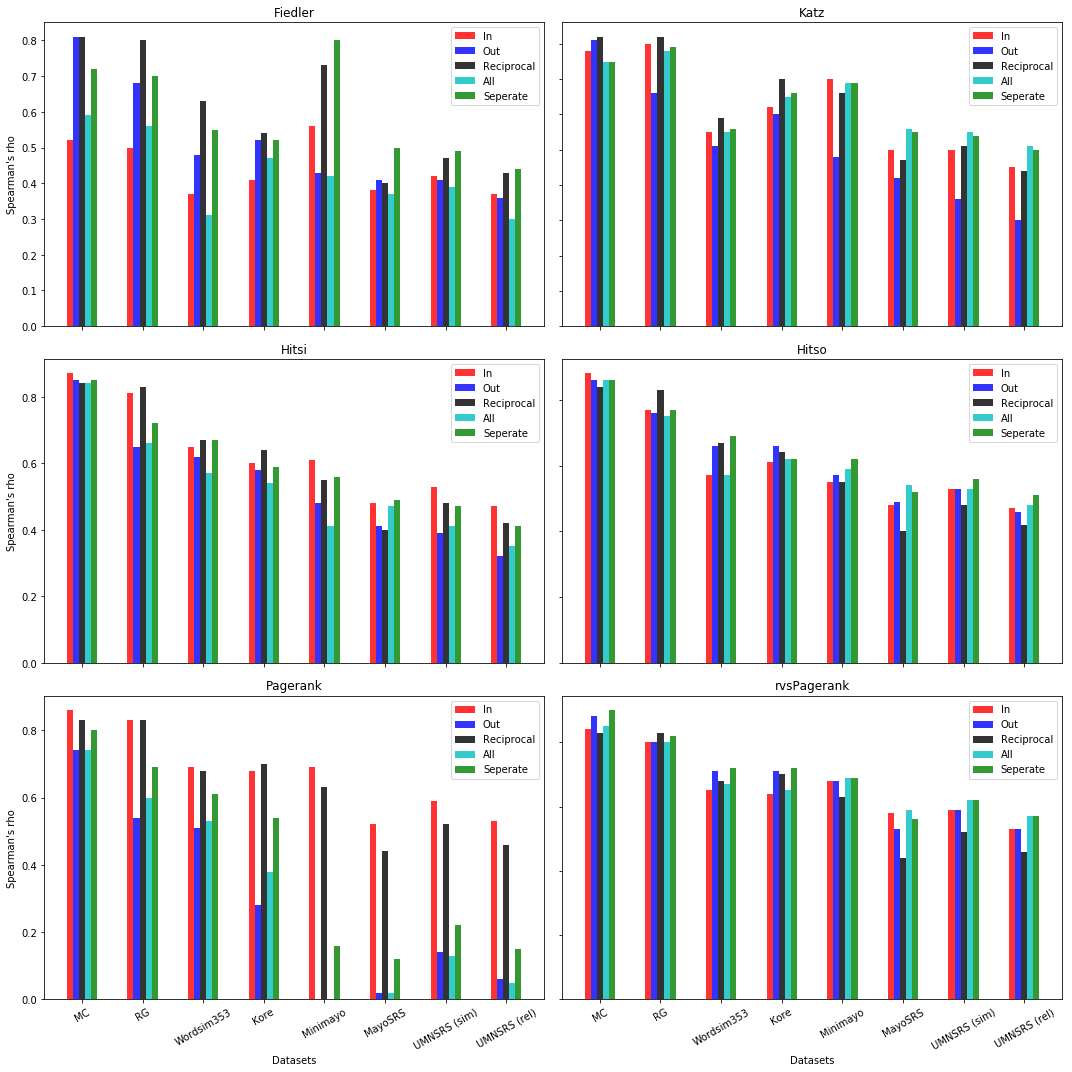

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



bar_width = 0.1

opacity = 0.8
error_config = {'ecolor': '0.3'}

index = np.arange(len(df4.columns))
plt.figure(num=None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
fig, axarr = plt.subplots(3, 2,figsize=(15,15))
i=0; j=0;
for (emmethod, method_name) in [('fied', 'Fiedler'), ('katz','Katz'), ('hitsi','Hitsi'), ('hitso','Hitso'), ('pagerank','Pagerank'), ('rvspagerank','rvsPagerank')]:
    in_results= df4.loc['in/hits/'+emmethod+'/results.cos.txt']
    out_results= df4.loc['out/hits/'+emmethod+'/results.cos.txt']
    rec_results=  df4.loc['rec/hits/'+emmethod+'/results.cos.txt']
    all_results= df4.loc['all/hits/'+emmethod+'/results.cos.txt']
    both_results= df4.loc['hitsboth.avg.'+emmethod+'.'+emmethod+'/results.cos.txt']
    axarr[i,j].set_title(method_name)

    rects4 = axarr[i,j].bar(index-2*bar_width, in_results, bar_width,
                     alpha=opacity,
                     color='r',
                     error_kw=error_config, label='In')
    rects5 = axarr[i,j].bar(index-bar_width, out_results, bar_width,
                     alpha=opacity,
                     color='b',
                     error_kw=error_config, label='Out')
    rects2 = axarr[i,j].bar(index, rec_results, bar_width,
                     alpha=opacity,
                     color='k',
                     error_kw=error_config, label='Reciprocal')
    rects1 = axarr[i,j].bar(index + bar_width, all_results, bar_width,
                     alpha=opacity,
                     color='c',
                     error_kw=error_config, label='All')
    rects3 = axarr[i,j].bar(index + 2*bar_width, both_results, bar_width,
                     alpha=opacity,
                     color='g', label='Seperate')

    axarr[i,j].legend()
    #plt.xlabel('Datasets and Candidate Numbers')
    #plt.ylabel('Time (Seconds)')
    j +=1
    if j==2:
        j=0
        i+=1    
    # l1=["DS1","DS2","DS3","DS4","DS5"]*3
    # l2=['5']*2+['10']*2+['15']*5



plt.legend()
plt.setp(axarr, xticks=index, xticklabels=['MC','RG','Wordsim353','Kore','Minimayo','MayoSRS','UMNSRS (sim)','UMNSRS (rel)'])
plt.setp([a.get_xticklabels() for a in axarr[0:2, :].flatten()], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1].flatten()], visible=False)    
plt.setp([a.get_xticklabels() for a in axarr[2, :].flatten()], rotation=30, fontsize=10)
for a in axarr[2,:]:
    a.set_xlabel("Datasets")
for a in axarr[:,0]:
    a.set_ylabel("Spearman's rho")

plt.tight_layout()
#     plt.legend(loc=2)
plt.savefig('allvsavg.eps')
plt.show()
    

# Cos vs Kend

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}

index = np.arange(len(df4.columns))
plt.figure(num=None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
fig, axarr = plt.subplots(3, 2,figsize=(15,15))
i=0; j=0;
for (emmethod, method_name) in [('fied', 'Fiedler'), ('katz','Katz'), ('hitsi','Hitsi'), ('hitso','Hitso'), ('pagerank','Pagerank'), ('rvspagerank','rvsPagerank')]:
    kend_results= df4.loc['hitsboth.avg.'+emmethod+'.'+emmethod+'/results.kend1.txt']
    cos_results= df4.loc['hitsboth.avg.'+emmethod+'.'+emmethod+'/results.cos.txt']
    axarr[i,j].set_title(method_name)
    rects1 = axarr[i,j].bar(index - bar_width/2, kend_results, bar_width,
                     alpha=opacity,
                     color='b',
                     error_kw=error_config, label='Kendall-tau')

    rects3 = axarr[i,j].bar(index +bar_width/2, cos_results, bar_width,
                     alpha=opacity,
                     color='g', label='Cosine')

    axarr[i,j].legend()
    #plt.xlabel('Datasets and Candidate Numbers')
    #plt.ylabel('Time (Seconds)')
    j +=1
    if j==2:
        j=0
        i+=1    
    # l1=["DS1","DS2","DS3","DS4","DS5"]*3
    # l2=['5']*2+['10']*2+['15']*5



plt.legend()
plt.setp(axarr, xticks=index,xticklabels=['MC','RG','Wordsim353','Kore','Minimayo','MayoSRS','UMNSRS (sim)','UMNSRS (rel)'])
plt.setp([a.get_xticklabels() for a in axarr[0:2, :].flatten()], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1].flatten()], visible=False)    
plt.setp([a.get_xticklabels() for a in axarr[2, :].flatten()], rotation=30, fontsize=10)
for a in axarr[2,:]:
    a.set_xlabel("Datasets")
for a in axarr[:,0]:
    a.set_ylabel("Spearman's rho")

plt.tight_layout()
#     plt.legend(loc=2)
plt.savefig('kendvscos.eps')
plt.show()
    

# Graph Embedding

In [ ]:
import pandas as pd

#don't remember why had header
#df = pd.read_csv('/home/sajadi/backup/tmp/results/wsd/reslog.csv', sep='\t', header=0)

df = pd.read_csv('/home/sajadi/backup/tmp/results/reslog.txt', sep='\t', header = None)
df.columns=['start','method', 'ds','dir','rho', 'pvalue']
df.head()

In [ ]:
df2=df.copy()
df2= df2.drop(['start','dir','pvalue'], axis=1)

df2=df2.pivot(index='method', columns='ds', values='rho')
df2

In [ ]:
df3=df2.iloc[:,[1,4,7,0,3,2,6,5]]
df3=df3.round(2)
df3

In [ ]:
print df3.to_latex()

In [ ]:
a=38.71
m=58
f=53
X=0.4*a+0.2*m+0.4*f
Y=0.4*a+0.6*f
print X
print Y


In [ ]:
"""
Show how to use an rrule instance to make a custom date ticker - here
we put a tick mark on every 5th easter

See https://moin.conectiva.com.br/DateUtil for help with rrules
"""
import matplotlib.pyplot as plt
from matplotlib.dates import YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange
import numpy as np
import datetime

# tick every 5th easter
rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
date1 = datetime.date(1952, 1, 1)
date2 = datetime.date(2004, 4, 12)
delta = datetime.timedelta(days=100)

dates = drange(date1, date2, delta)
s = np.random.rand(len(dates))  # make up some random y values


fig, ax = plt.subplots()
plt.plot_date(dates, s)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

plt.show()